# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
#Combine different dataset from Kaggle
netflix_data = pd.read_csv('../data/Netflix.csv')
disney_data = pd.read_csv('../data/Disney_plus.csv')
hbo_data = pd.read_csv('../data/HBO.csv')
paramount_data = pd.read_csv('../data/Paramount.csv')

In [3]:
netflix_data["platform"] = "netflix"
disney_data["platform"] = "disney"
hbo_data["platform"] = "hbo"
paramount_data["platform"] = "paramount"

platform_data = pd.concat([netflix_data, disney_data, hbo_data, paramount_data])

# Data Exploration

In [4]:
platform_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,netflix
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,netflix
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,netflix
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,netflix
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,netflix


In [5]:
platform_data.isnull().sum()

id                         0
title                      1
type                       0
description               49
release_year               0
age_certification       5675
runtime                    0
genres                     0
production_countries       0
seasons                 9601
imdb_id                 1290
imdb_score              1493
imdb_votes              1523
tmdb_popularity          192
tmdb_score              1176
platform                   0
dtype: int64

In [6]:
platform_data = platform_data.drop(columns=(["age_certification","imdb_id","imdb_score","imdb_votes"]))

In [7]:
platform_data.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,51,['documentation'],['US'],1.0,0.600,NaN,netflix
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],NaN,40.965,8.179,netflix
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,10.010,7.300,netflix
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,15.461,7.811,netflix
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",NaN,20.398,7.600,netflix


#### From the genres and production countries column we can see list value with multiple string within it, and they need to be seperate for data understanding.

In [8]:
from sklearn.preprocessing import OneHotEncoder
import re



In [11]:
platform_dt = platform_data

### One hot encoding method in genres

In [12]:
import re
import pandas as pd

# Clean up the genres column by removing square brackets, quotes, etc., and handle lists
platform_dt['genres'] = platform_dt['genres'].apply(
    lambda x: [re.sub(r"[\[\]']", "", genre) for genre in x] if isinstance(x, list) else re.sub(r"[\[\]']", "", x)
)

# Ensure all genres are lists
platform_dt['genres'] = platform_dt['genres'].apply(
    lambda x: x.split(', ') if isinstance(x, str) else x
)

# Get unique genres and ensure they are clean
unique_genres = pd.Series([genre.strip() for sublist in platform_dt['genres'] for genre in sublist]).unique()

# One-hot encode the genres
for genre in unique_genres:
    platform_dt[genre] = platform_dt['genres'].apply(lambda x: 1 if genre in x else 0)

# Summing up the occurrences of each genre to get counts
genre_counts = platform_dt[unique_genres].sum()

# Print the genre counts
print(genre_counts)


documentation    2514
drama            5830
crime            1874
action           2592
thriller         2408
european          918
fantasy          1634
comedy           5101
war               398
romance          2113
western           350
history           608
music             651
family           2058
horror            887
scifi            1514
animation        1712
reality           482
sport             407
                  194
dtype: int64


In [13]:
genre_counts = genre_counts.drop([''])
genre_counts.index

Index(['documentation', 'drama', 'crime', 'action', 'thriller', 'european',
       'fantasy', 'comedy', 'war', 'romance', 'western', 'history', 'music',
       'family', 'horror', 'scifi', 'animation', 'reality', 'sport'],
      dtype='object')

# Categorical Feature Statistics

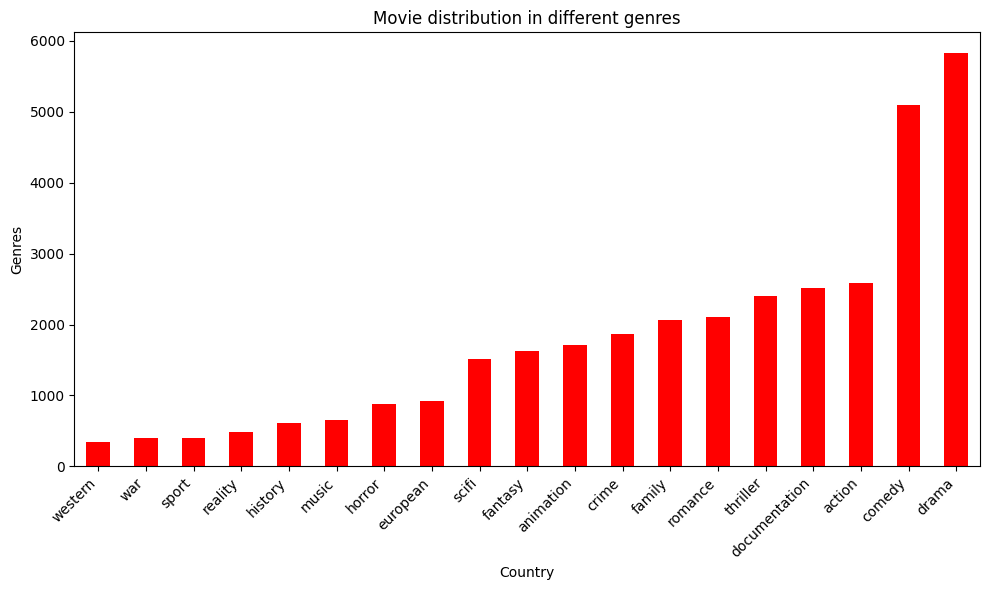

In [14]:
genre_counts = genre_counts.sort_values(ascending=True)
# Sort the production_country_counts in descending order and select the top 20

# Create a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='red')

# Add titles and labels
plt.title('Movie distribution in different genres')
plt.xlabel('Country')
plt.ylabel('Genres')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### One hot encoding method in production countries 

In [15]:
import re

# Clean up the production_countries column, making sure to handle lists correctly
# Remove square brackets and any stray single or double quotes from each country in the list
platform_dt['production_countries'] = platform_dt['production_countries'].apply(
    lambda x: [re.sub(r"[\[\]']", "", country) for country in x] if isinstance(x, list) else x
)

# Split the production_countries into a list if it's not already a list (you can skip this if they're already lists)
platform_dt['production_countries'] = platform_dt['production_countries'].apply(
    lambda x: x.split(', ') if isinstance(x, str) else x
)

# Now, you can proceed with the rest of the code for one-hot encoding and summarizing counts
unique_production_countries = pd.Series([country for sublist in platform_dt['production_countries'] for country in sublist]).unique()

# One-hot encode the production_countries
for production_country in unique_production_countries:
    platform_dt[production_country] = platform_dt['production_countries'].apply(lambda x: 1 if production_country in x else 0)

# Summing up the occurrences of each production country to get counts
production_country_counts = platform_dt[unique_production_countries].sum()

# Drop any empty country strings if they exist
production_country_counts = production_country_counts[production_country_counts.index != '']

# Print the result
print(production_country_counts)


/var/folders/t2/kk80pdcx5_j7hwhjb5973hy80000gn/T/ipykernel_94384/2705070401.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  platform_dt[production_country] = platform_dt['production_countries'].apply(lambda x: 1 if production_country in x else 0)
/var/folders/t2/kk80pdcx5_j7hwhjb5973hy80000gn/T/ipykernel_94384/2705070401.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  platform_dt[production_country] = platform_dt['production_countries'].apply(lambda x: 1 if production_country in x else 0)
/var/folders/t2/kk80pdcx5_j7hw

['US']    7497
['GB']     524
['GB'      221
'US']      565
['EG']      39
          ... 
'HK'         1
'AQ']        1
['BM']       1
['KH'        1
'PK'         1
Length: 339, dtype: int64


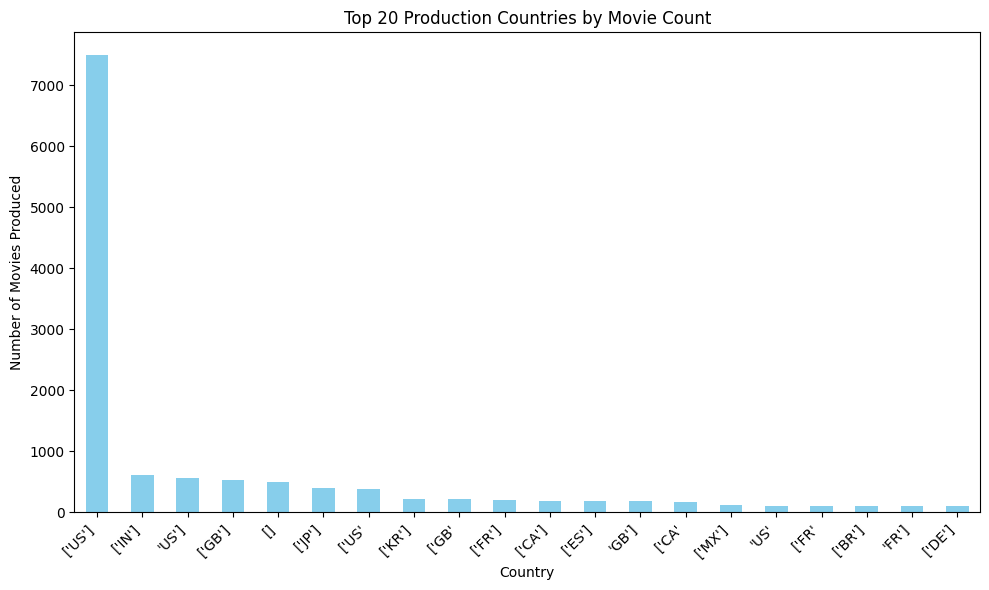

In [16]:
production_country_counts = production_country_counts.sort_values(ascending=True)
# Sort the production_country_counts in descending order and select the top 20
top20_production_country_counts = production_country_counts.sort_values(ascending=False).head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))
top20_production_country_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Top 20 Production Countries by Movie Count')
plt.xlabel('Country')
plt.ylabel('Number of Movies Produced')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Data Exploration

#### Distribution of dataset among Years

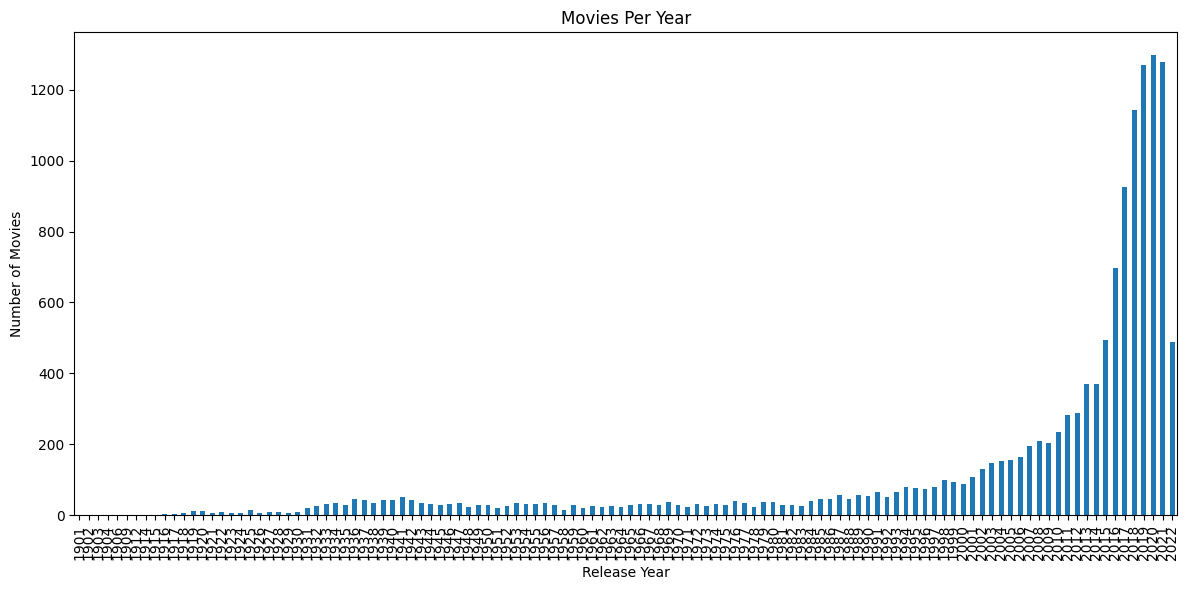

In [17]:
release_year_tmdb = platform_dt['release_year'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
release_year_tmdb.plot(kind='bar')
plt.title('Movies Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


#### Distribution of dataset among genres

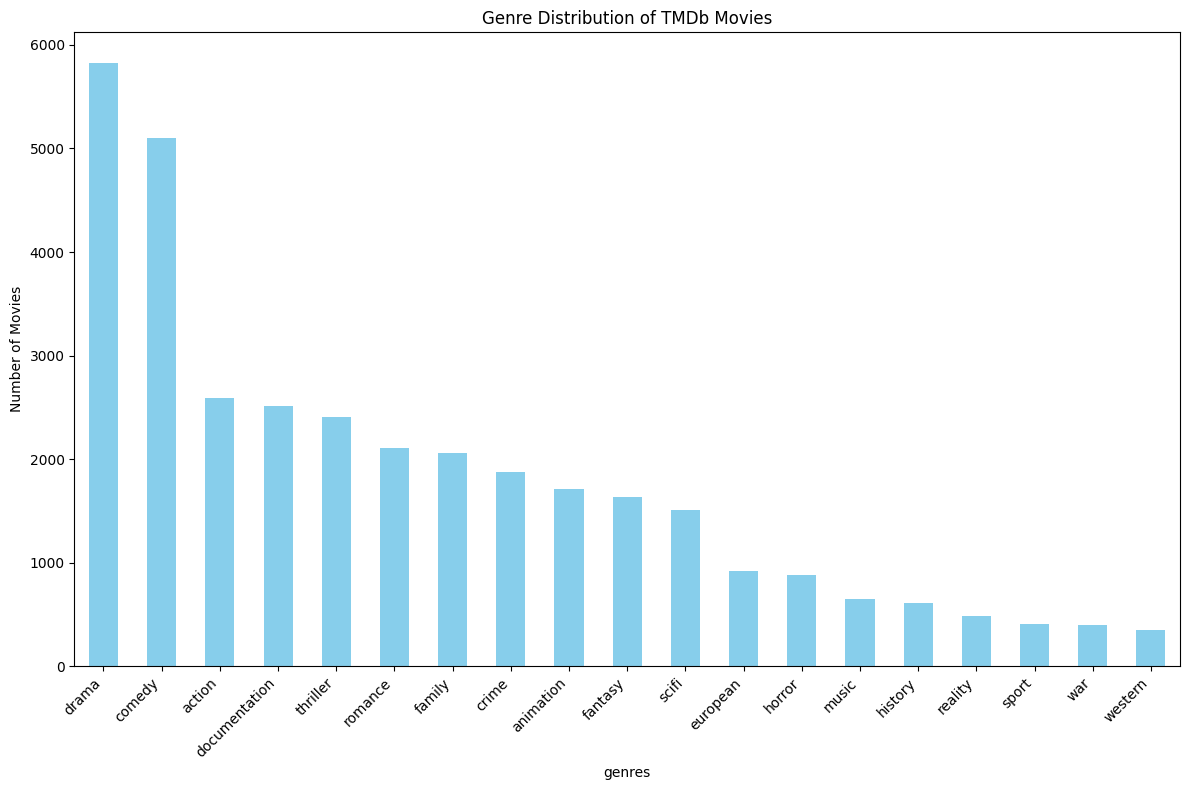

In [18]:
# Sort the genre counts in descending order for better visibility
genre_counts_sorted = genre_counts.sort_values(ascending=False)

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart with sorted genres
genre_counts_sorted.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Genre Distribution of TMDb Movies')
plt.xlabel('genres')
plt.ylabel('Number of Movies')

# Rotate the x-ticks with better alignment
plt.xticks(rotation=45, ha='right')  # Rotate the labels 45 degrees and align to the right

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()

## Findings

#### Year of the movies: The distribution of movies are heavily skewed to the right side, movies data start increasing rapidly from 2014 to 2019 then start to slow down.
#### Production Countries: Most of the production movies from the data are based in US indicating the preference of the platform audience.
#### Genres: Comedy and genres has the largest movies numbers within the genre Category.

# Missing data

## Find the Release year of the rows with missing score

In [19]:
platform_data_na = platform_data[platform_data["tmdb_score"].isnull()]
len(platform_data_na)

1176

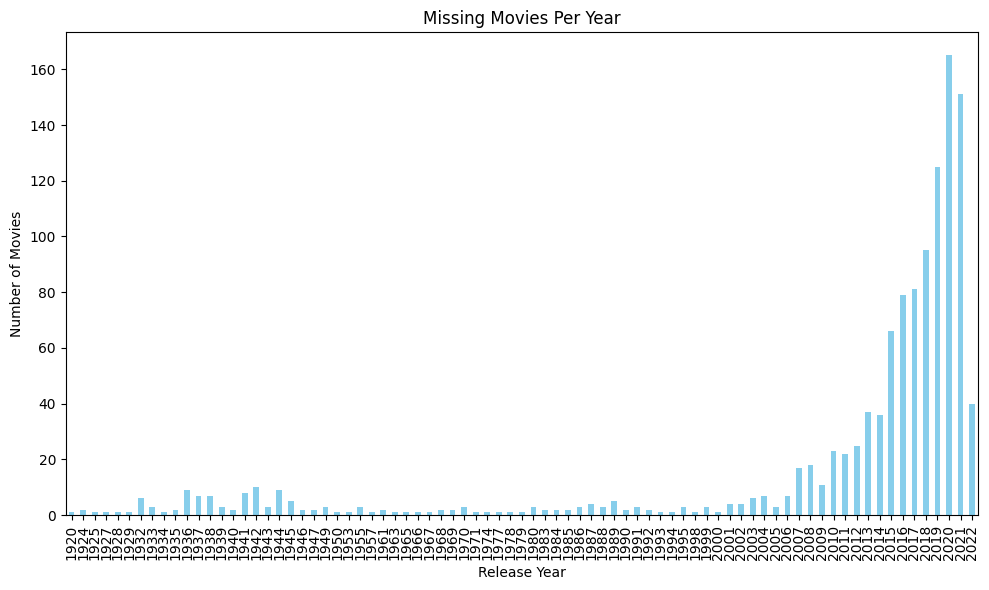

In [20]:
release_year_data = platform_data_na['release_year'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
release_year_data.plot(kind='bar', color='skyblue')
plt.title('Missing Movies Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# The missing Data pattern among the years are similar to the original dataset, therefore i will simply remove the missing values rows as it would not affect the proportion of the original dataset.


In [22]:
platform_dt.to_csv('../data/combined_df.csv')

In [23]:
platform_dt.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,tmdb_popularity,...,'SN',['CU'],['SB',['ZM'],['SV','HK','AQ'],['BM'],['KH','PK'
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,51,[documentation],[['US']],1.0,0.600,...,0,0,0,0,0,0,0,0,0,0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"[drama, crime]",[['US']],NaN,40.965,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"[drama, action, thriller, european]",[['US']],NaN,10.010,...,0,0,0,0,0,0,0,0,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"[fantasy, action, comedy]",[['GB']],NaN,15.461,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"[war, action]","[['GB', 'US']]",NaN,20.398,...,0,0,0,0,0,0,0,0,0,0
